<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B2%20Python/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%20%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8/netology_stat_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Базовые понятия статистики

Булыгин Олег:
* [LinkedIn](linkedin.com/in/obulygin)
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/weight-height.csv')

# какие типы признаков в нашем датафрейме?
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# переведем в килограммы и сантиметры
df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.45

## Минимум, максимум и размах

In [ ]:
print(max(df['Height']))
print(np.max(df['Height']))
print(df['Height'].max())

200.6568055598296
200.6568055598296
200.6568055598296


In [ ]:
print(min(df['Weight']))
print(np.min(df['Weight']))
print(df['Weight'].min())

29.115057020738853
29.115057020738853
29.115057020738853


In [ ]:
df[df['Weight'] == df['Weight'].min()]

,Gender,Height,Weight
9285,Female,137.828359,29.115057


In [ ]:
# размах – разница между минимальным и максимальным значением
weight_range = df['Weight'].max() - df['Weight'].min()
height_range = df['Height'].max() - df['Height'].min()
print(weight_range)
print(height_range)

92.38030730655885
62.828446914082946


## Среднеарифметическое

In [ ]:
# ручной подсчет
sum(df['Weight']) / len(df['Weight'])

72.64816057477415

In [ ]:
print(np.mean(df['Weight']))
print(df['Weight'].mean())

72.64816057477385
72.64816057477385


## Мода

In [ ]:
print('Значение моды: ', df['Gender'].mode()[0])

Значение моды:  Female


## Медиана

In [ ]:
print(df['Height'].median())
print(np.median(df['Height']))

168.447898007733
168.447898007733


## СКО

In [ ]:
print('Рост')
print(df['Height'].std())
print(np.std(df['Height'], ddof=1)) # дельта степеней свободы в numpy по умолчанию 0

print('Вес')
print(df['Weight'].std())
print(np.std(df['Weight'], ddof=1))

Рост
9.772721426764
9.772721426764
Вес
14.44879755293382
14.44879755293382


## Дисперсия

In [ ]:
print('Рост')
print(np.var(df['Height'], ddof=1))
print(df['Height'].var())

print('Вес')
print(np.var(df['Weight'], ddof=1))
print(df['Weight'].var())

Рост
95.50608408513222
95.50608408513222
Вес
208.76775072566633
208.76775072566633


## Квантили

In [ ]:
# это же медиана!
df['Height'].quantile()

168.447898007733

In [ ]:
# первый и третий квартили
df['Height'].quantile([0.25, 0.75])

0.25    161.304276
0.75    175.702625
Name: Height, dtype: float64

In [ ]:
# произвольный перцентиль
df['Height'].quantile(0.33)

163.6892051899301

In [ ]:
# межквартильный размах
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
IQR

14.398348763864021

## Describe

In [ ]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,72.648161
std,9.772721,14.448798
min,137.828359,29.115057
25%,161.304276,61.118123
50%,168.447898,72.545817
75%,175.702625,84.226286
max,200.656806,121.495364


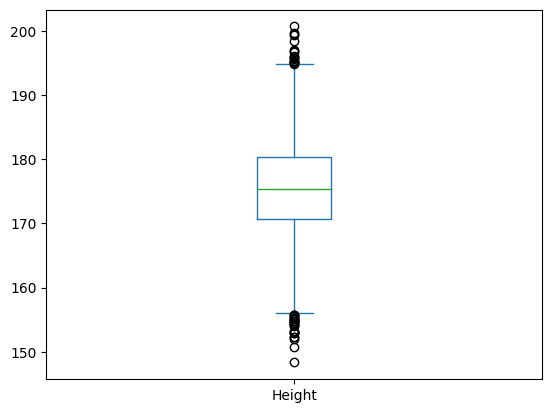

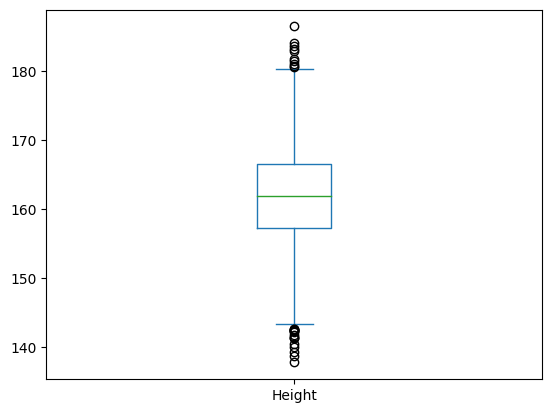

In [ ]:
import matplotlib.pyplot as plt
df[df['Gender'] == 'Male']['Height'].plot(kind='box')
plt.show()
df[df['Gender'] == 'Female']['Height'].plot(kind='box')
plt.show()

## Выбросы

In [ ]:
# тыкнем пальцем в небо (определим выбросы вручную) и посмотрим, как изменились средние
print(df['Weight'].mean())
print(df[(df['Weight'] > 50) & (df['Weight'] < 150)]['Weight'].mean())

72.64816057477385
74.04876258391796


In [ ]:
# а медиана?
print(df['Weight'].median())
print(df[(df['Weight'] > 50) & (df['Weight'] < 150)]['Weight'].median())

72.54581746476734
73.7809355907585


In [ ]:
# ну с модой все понятно
print(df['Weight'].round().mode()[0])
print(df[(df['Weight'] > 50) & (df['Weight'] < 150)]['Weight'].round().mode()[0])

А теперь найдем выбросы через межквартльный размах (на примере роста)

PS: через межквартильный размах корректно искать выбросы в нормально распределенных данных (про распределения будет дальше на курсе)

In [ ]:
q1 = df['Height'].quantile(0.25)
q3 = df['Height'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['Height'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

<ipython-input-25-65677f7ddcec>:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df[df['Height'].between(lower_bound, upper_bound, inclusive=True)]


,Gender,Height,Weight
0,Male,187.571423,108.852103
1,Male,174.706036,73.039713
2,Male,188.239668,95.733385
3,Male,182.196685,99.019112
4,Male,177.499761,92.857410
...,...,...,...
9995,Female,168.078536,61.549854
9996,Female,170.350573,76.890558
9997,Female,162.224700,57.813893
9998,Female,175.346978,73.733608


In [ ]:
# что это за выбросы?
df[~df['Height'].between(lower_bound, upper_bound, inclusive=True)]

<ipython-input-26-a08a6223dc9a>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df[~df['Height'].between(lower_bound, upper_bound, inclusive=True)]


,Gender,Height,Weight
994,Male,198.363503,115.060876
1317,Male,199.293614,102.304154
2014,Male,200.656806,121.495364
3285,Male,199.461654,114.250052
3757,Male,199.698290,110.580202
6624,Female,138.726819,32.127187
7294,Female,139.379268,35.373002
9285,Female,137.828359,29.115057


In [ ]:
print(remove_outliers['Height'].mean())
print(remove_outliers['Height'].median())

In [ ]:
print(df['Height'].mean() - remove_outliers['Height'].mean())

In [ ]:
print(df['Height'].median() - remove_outliers['Height'].median())

## Пропуски

Как часто в реальной жизни приходится заполнять пропуски?

На самом деле не часто. Заполнять нужно в том случае, когда алгоритм, для которого готовятся данные, чувствителен к пропускам. Например, регрессии и нейросети – чувствительны, а корреляция и стат-тесты нет (хотя для стат-тестов пропуски нужно удалять).

Кроме того, заполнять мы, строго говоря, имеем право только когда данные пропущены совершенно случайно (MCAR) – тогда заполнение не повлияет на характер связи междузаполняемой переменной и остальными. А то, что у нас MCAR нужно еще доказать.

Но это нужно уметь делать в тех случаях, когда необходимо.

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/titanic.csv')
titanic.info()
titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Если в данных пропуски представлены в виде каких-то конкретных значений (пустые строк, -, ? и пр.), то используйте аргумент na_values при чтении файла.

In [ ]:
(titanic.isna().mean() * 100).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### Игнорирование пропусков

In [ ]:
# все методы pandas по-умолчанию просто не берут в расчет пропуски
print(titanic['Age'].mean())
print(titanic['Age'].median())
print(titanic['Age'].mode()[0])

print(titanic['Age'].std())
print(titanic['Age'].var())

29.69911764705882
28.0
24.0
14.526497332334042
211.01912474630802


### Удаление строк с пропусками

In [ ]:
titanic.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
# посмотрите на сколько исказились статистики, если мы удалим все строки с пропусками
print(titanic.dropna()['Age'].mean())
print(titanic.dropna()['Age'].median())
print(titanic.dropna()['Age'].mode()[0])

print(titanic.dropna()['Age'].std())
print(titanic.dropna()['Age'].var())

35.6744262295082
36.0
36.0
15.643865966849717
244.7305423887588


In [ ]:
# предположим, мы хотим оставить только те строки, в которых как минимум 11/12 значений заполнено
titanic.dropna(thresh=11)

### Удаление столбцов с пропусками

In [ ]:
# удалять все в данном случае – странно
titanic.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [ ]:
# у нас очень много пропусков в Cabin. Нам эта информация точно нужна?
titanic.drop(['Cabin'], axis=1).info()

### Замена пропусков

Замена на определенное значение

In [ ]:
fill_by_cnst = titanic.copy()
fill_by_cnst['Cabin'] = fill_by_cnst['Cabin'].fillna('no_info')
print(fill_by_cnst['Cabin'].isna().sum())
print(fill_by_cnst['Cabin'].unique())

0
['no_info' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C50' 'B42' 'C148']


Заполняя пропуски, мы хотим сохранить параметры распределения заполняемой переменной – математическое ожидание и дисперсию. Самый простой способ это сделать – заполнить средним или медианой. В этом случае сохраняется среднее, но дисперсией приходится пожертвовать.

Замена средним

In [ ]:
# возраст дискретен, при заполнении средними еще стоит округлить. Проигнорируем в учебных целях

fill_mean = titanic.copy()

fill_mean['Age'] = fill_mean['Age'].fillna(titanic['Age'].mean())

In [ ]:
print(titanic['Age'].describe())
print('-----------------------------------')
print(fill_mean['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
-----------------------------------
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


Замена медианой

In [ ]:
fill_median = titanic.copy()

fill_median['Age'] = fill_median['Age'].fillna(titanic['Age'].median())

In [ ]:
print(titanic['Age'].describe())
print('-----------------------------------')
print(fill_median['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
-----------------------------------
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


Замена модой

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_fill_mode = titanic.copy()
titanic_fill_mode['Embarked'] = titanic_fill_mode['Embarked'].fillna(titanic['Embarked'].mode()[0])

titanic_fill_mode['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

В большинстве случаев это слишком наивные варианты заполнения, как минимум стоит заполнять значениями в разрезе других признаков (когда применимо).

Заполнение пропусков с группировкой по
одной переменной

In [ ]:
# мы не можем исключать, что медианный возраст мужчин и женщин отличался
print(titanic.groupby('Sex')['Age'].median())
fill_median_by_gender = titanic.copy()
fill_median_by_gender['Age'] = fill_median_by_gender['Age'].fillna(titanic.groupby('Sex')['Age'].transform('median'))

Sex
female    27.0
male      29.0
Name: Age, dtype: float64


In [ ]:
# а может быть и в разных классах были пассажиры разного возраста?
print(titanic.groupby(['Sex', 'Pclass'])['Age'].median())
fill_median_by_groups = titanic.copy()
fill_median_by_groups['Age'] = fill_median_by_groups['Age'].fillna(titanic.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


Заполнение следующими/предыдущими значениями

In [ ]:
city_day = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/city_day.csv', parse_dates=True, index_col='Date')
city_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


In [ ]:
city_day

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [ ]:
(city_day.isna().mean() * 100).round(2)

City           0.00
PM2.5         15.57
PM10          37.72
NO            12.13
NO2           12.14
NOx           14.17
NH3           34.97
CO             6.97
SO2           13.05
O3            13.62
Benzene       19.04
Toluene       27.23
Xylene        61.32
AQI           15.85
AQI_Bucket    15.85
dtype: float64

In [ ]:
city_day.fillna(method='ffill', inplace=True)

In [ ]:
city_day.fillna(method='bfill', inplace=True)

In [ ]:
(city_day.isna().mean() * 100).round(2)

City          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64